# Importing Necessary Libraries

In [ ]:

import nltk
import numpy as np
import pandas as pd
import random
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from collections import Counter
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn import feature_extraction, manifold
from nltk import FreqDist
import wordcloud
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.mixture import GaussianMixture
import seaborn as sns
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import cohen_kappa_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import cohen_kappa_score
from __future__ import print_function
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.sklearn_api import TfIdfTransformer
import codecs
import numpy as np
import logging
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import calinski_harabasz_score
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing

from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:

#  download  gutenberg  and  punkit

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# **Cleanning and Preprocessing**

In [ ]:
def preprocessing_cleaning(  book_text , flg_stemm=False, flg_lemm=True   ):
  book_text = book_text.lower()                                # convert to lower case 
  tokenizer = RegexpTokenizer(r'\w+')                                         # remove Punctuation and special characters 
  tokens = tokenizer.tokenize(book_text)                                # Remove stop words 
  book_words = [w for w in tokens if not w in stopwords.words('english')]
  # return " ".join(filtered_words)
                                                    #                Stemming (remove -ing, -ly, ...)
  if flg_stemm == True:
      ps = nltk.stem.porter.PorterStemmer()
      book_words = [ps.stem(word) for word in book_words]
           
                                                      #                Lemmatisation (convert the word into root word)
  if flg_lemm == True:
      lem = nltk.stem.wordnet.WordNetLemmatizer()
      book_words = [lem.lemmatize(word) for word in book_words]

  return book_words 

# sentence = "At eight o'clock on Thursday morning Arthur didn't feel very good. French-Fries"
# print ( preprocessing_cleaning(sentence)  )



# **Partitioning books** 
 

In [ ]:

def Partition_of_Books(  book_names , number_of_partitions  ,  number_of_words  ):
  book_partitions_list = [ ]     # list to save 200 partition for every book
  book_labels_list = [ ]         # list to save the label or book name for every partition
  for book in book_names:
    f = urlopen(book)
    text = f.read().decode('utf-8')    
    book_words = preprocessing_cleaning( text  )
    # tokenized_word =  nltk.word_tokenize(text)      # to split our text to words
    # text = nltk.Text( tokenized_word )
    # text = [word for word in text if not word in stopwords.words()]
 
    for x in range( number_of_partitions ):
      randoms  = np.random.randint( 0 ,  (len( book_words ) - number_of_words ) )  # to randomize the location where we get the partition
      partition_words = ( book_words[ randoms : randoms + number_of_words ] )   # save the partition
      partition_string = " ".join( partition_words )
      book_partitions_list.append( partition_string ) 
      book_labels_list.append( book_names.index(book) )                                             # save the label
  return  book_partitions_list , book_labels_list




In [ ]:
     # Let's Check our Function

#  Let's pass three books to our method
from urllib.request import urlopen
number_of_words = 150
number_of_partitions = 200
labled=["1","2","3","4","5"]
book_names = [ 'https://www.gutenberg.org/cache/epub/7361/pg7361.txt', 'https://www.gutenberg.org/cache/epub/6884/pg6884.txt', 'https://www.gutenberg.org/files/30065/30065-0.txt' , 'https://www.gutenberg.org/cache/epub/5767/pg5767.txt' , 'https://www.gutenberg.org/cache/epub/37144/pg37144.txt' ]
book_partitions_list , book_labels_list =  Partition_of_Books(  book_names ,  number_of_partitions  ,  number_of_words   )

print( len( book_labels_list  ) )
print( len(book_partitions_list) )



1000
1000


In [ ]:

len(book_labels_list)

1000

# **Converting to dataFrame**  

 


In [ ]:

# Let's use DataFrame to store our data   book_labels_list ,  book_partitions_list

df = pd.DataFrame(  [[ book_partition , book_label   ] for book_partition , book_label   in zip( book_partitions_list , book_labels_list )])

#  this is to export our csv file and save it on our machines  ( Serializatioin )
df.to_csv(  "F:\DEBI\My_file.csv"  )

# You can change this url to your url on your machine to save the csv file in your desktop


# **Visualizing our Data** 

## **Word Cloud:** is a data visualization chart that describes words which have the highest frequency in our dataset 

for all books book number 


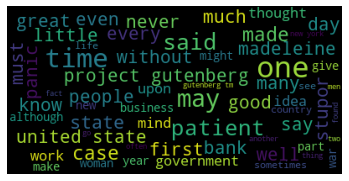

for book number  0


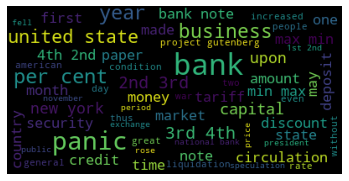

for book number  1


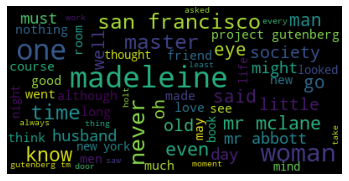

for book number  2


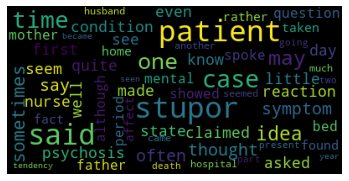

for book number  3


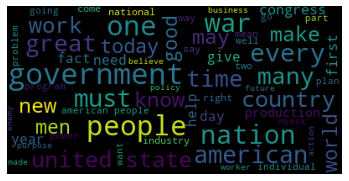

for book number  4


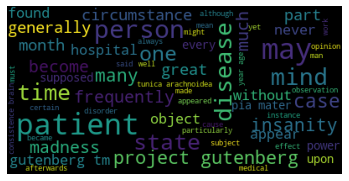

In [ ]:
print("for all books book number ")
wc = wordcloud.WordCloud( background_color='black',    max_words=60 ,     max_font_size=35  )
wc = wc.generate(str( book_partitions_list  ))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()


for i in range(0,1000,200):
  wc = wordcloud.WordCloud( background_color='black',    max_words=60 ,     max_font_size=35  )
  wc = wc.generate(str( book_partitions_list[0+i:200+i]  ))
  print("for book number ",int(i/200))
  fig = plt.figure(num=1)
  plt.axis('off')
  plt.imshow(wc, cmap=None)
  plt.show()

## **Unigrams and Bigrams** is a data visualization diagram that helps us understand the most highest frequency in our dataset

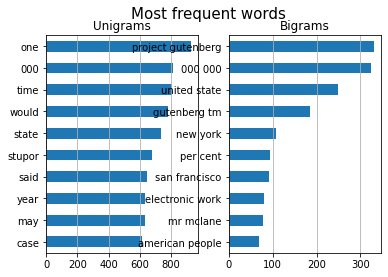

In [ ]:
top=10

def get_separate_words( book_names ):
  all_book_words = [ ]
  for book in book_names:
    f = urlopen(book)
    text = f.read().decode('utf-8')    
    words =  ( preprocessing_cleaning( text  )  )
    all_book_words.append(  words )

  all_words = [ ]
  for x in range( len( all_book_words  )  ):
    for y in range( len( all_book_words[x] ) ):
      all_words.append( all_book_words[x][y] )
  return all_words


# lst_tokens =   book_partitions_list[0]  
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle("Most frequent words", fontsize=15)
    
## unigrams
dic_words_freq = nltk.FreqDist(get_separate_words( book_names ))
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                       columns=["Word","Freq"])
dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Unigrams", ax=ax[0], 
                  legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
## bigrams
dic_words_freq = nltk.FreqDist(nltk.ngrams(get_separate_words( book_names ) , 2  ))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), 
                      columns=["Word","Freq"])
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(
                   string for string in x) )
print("\n")
dtf_bi.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                  kind="barh", title="Bigrams", ax=ax[1],
                  legend=False).grid(axis='x')
ax[1].set(ylabel=None)
plt.show()

# **Bow and TF_IDF**

In [ ]:
def Bow_Tf_Idf(   book_partitions_list  ):


  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform( book_partitions_list )  # we calculated  bag of words to calculate the frequency of every word of the text.
  tfidf_transformer = TfidfTransformer()
  X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts).todense()   # we calculated the Term frequency (TF) and Inverse document Frequency (IDF)
  # X_train_tfidf.shape
  return  X_train_tfidf


In [ ]:
xx =  Bow_Tf_Idf( book_partitions_list )
print( xx.shape )
# print( xx )
# print(  len( xx )   )

(1000, 13222)


# **N-gram**

In [ ]:
print( len( book_partitions_list  ))
tf_idf = Bow_Tf_Idf(  book_partitions_list )
print(   tf_idf.shape )   


def ngram(book_partitions_list , n ):
  count_vect = CountVectorizer(ngram_range=(1,n)   )
  X_train_counts = count_vect.fit_transform( book_partitions_list )
  tfidf_transformer = TfidfTransformer()
  X_train_ngrams = tfidf_transformer.fit_transform(X_train_counts)
  print( type( X_train_ngrams) )
  return  X_train_ngrams.todense()

c=ngram( book_partitions_list, 2 )
print(c.shape )

1000
(1000, 13222)
<class 'scipy.sparse.csr.csr_matrix'>
(1000, 93141)


# **LDA** 

In [ ]:
def lda(book_partitions_list) :

  count_vect = CountVectorizer()
  X_train_counts = count_vect.fit_transform( book_partitions_list )
  LDA = LatentDirichletAllocation( n_components=7,random_state=42 )
  LDA.fit(X_train_counts)
  X_train_LDA = LDA.transform(X_train_counts)
  # print( type(X_train_LDA  ))
  return X_train_LDA 

t=lda(book_partitions_list)
t.shape
   


(1000, 7)

In [ ]:



# tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
# X_train_tf = tf_transformer.transform(X_train_counts)
# X_train_tf.shape

# **Plotting our Data** 

In [ ]:
X_TF_IDF_features = Bow_Tf_Idf( book_partitions_list )
X_N_Gram_features = ngram( book_partitions_list ,  2 ) 
X_LDA_features = lda(book_partitions_list)

print( len( X_TF_IDF_features) )

<class 'scipy.sparse.csr.csr_matrix'>
1000


In [ ]:
print ( X_TF_IDF_features.shape )

(1000, 13222)


In [ ]:
#!pip install --upgrade gensim

In [ ]:
text=[]
for i in range(len(book_partitions_list)) :
  text.append(preprocessing_cleaning(book_partitions_list[i]))

print( len( text) )

1000


# **## word embedding**

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing
import nltk
from nltk.corpus import stopwords

In [ ]:

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(text)]


cores = multiprocessing.cpu_count()

model_dbow = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores, alpha=0.025, min_alpha=0.001)

model_dbow.build_vocab([x for x in tqdm( documents)])
train_documents  = utils.shuffle(documents)
model_dbow.train(train_documents,total_examples=len(train_documents), epochs=30)


def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors


# model_dbow.save('./movieModel.d2v')



100%|██████████| 1000/1000 [00:00<00:00, 188813.54it/s]


In [ ]:

y_train, X_Word2vec_feature = vector_for_learning(model_dbow, documents)



# **Building Models ( K-Means , EM ,   Hierarchical Clustering  ) with F_IDF**  

 

## **Trying different method ( to find no .of clusters to be selected) WCSS and Elbow Method**    

In [ ]:
pca = PCA(  n_components=2  )
X_TF_IDF_features_2D = pca.fit_transform(  X_TF_IDF_features   )
X_N_Gram_features_2d = pca.fit_transform(  X_N_Gram_features   )
X_LDA_features_2d = pca.fit_transform(  X_LDA_features   )
_Word2Vec_feature_2d = pca.fit_transform(  X_Word2vec_feature  )


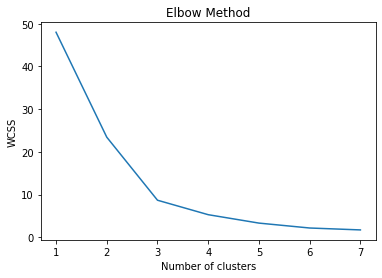

In [ ]:



wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit( X_TF_IDF_features_2D )
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show() 


In [ ]:
pca = PCA(  n_components=2  )
X_TF_IDF_features_2D = pca.fit_transform(  X_TF_IDF_features   )
X_N_Gram_features_2d = pca.fit_transform(  X_N_Gram_features   )
X_LDA_features_2d = pca.fit_transform(  X_LDA_features   )
X_Word2Vec_feature_2d = pca.fit_transform(  X_Word2vec_feature  )

# **Building K_means Model with TF_IDF , N_grams , LDA**

In [ ]:
print( len( X_Word2Vec_feature_2d ))

1000


In [ ]:
def Build_K_means( Data_2D ):

  kmeans = KMeans( n_clusters=4 , init='k-means++', max_iter=300, n_init=10, random_state=0)
  pred_y = kmeans.fit_predict(  Data_2D   )
  kappa=cohen_kappa_score(book_labels_list, pred_y )
  print(" kappa =",kappa)

  
  score = silhouette_score(X_LDA_features_2d, pred_y)
  print(" silhouette_score =",score)

  plt.scatter(  Data_2D[:,0],   Data_2D[:,1] )
  plt.scatter(  kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
  plt.show(  )

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot3d(data_2D):
  fig = plt.figure()
  ax = plt.axes(projection='3d')


  x = data_2D[:,0]
  y = data_2D[:,1]
  z = 6 * np.random.random(1000)

  ax = plt.axes(projection='3d')
  ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);


  fig = plt.figure()
  ax = plt.axes(projection='3d')


  z = data_2D[:,0]
  x = data_2D[:,1]
  y = 6 * np.random.random(1000)

  ax = plt.axes(projection='3d')
  ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

# **Plotting K_means with TF_IDF features**

In [ ]:
X_TF_IDF_features_2D

array([[ 0.00769357,  0.01705082],
       [ 0.03504797,  0.01168482],
       [ 0.79975136, -0.03160665],
       ...,
       [-0.08022419, -0.05400964],
       [-0.04186583,  0.01497777],
       [-0.07016989, -0.01073581]])

 kappa = -0.14874999999999994
 silhouette_score = -0.08757519962592385


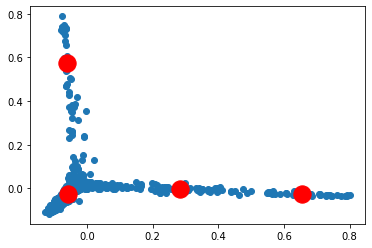

In [ ]:

Build_K_means( X_TF_IDF_features_2D )

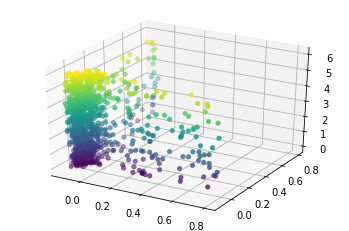

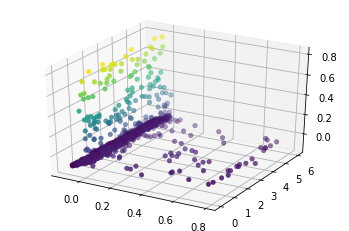

In [ ]:
plot3d(X_TF_IDF_features_2D)

# **Plotting K_means with N_Grams features**

 kappa = -0.1475000000000002
 silhouette_score = -0.09858109377804807


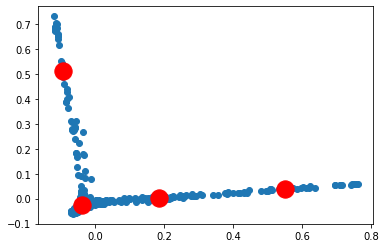

In [ ]:
Build_K_means( X_N_Gram_features_2d )


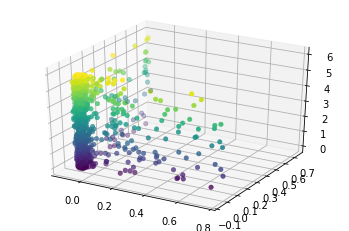

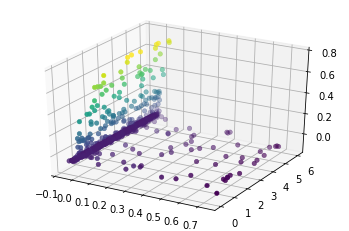

In [ ]:
plot3d(X_N_Gram_features_2d)

# **Plotting K_means with LDA features**

 kappa = -0.20750000000000002
 silhouette_score = 0.5199435122043328


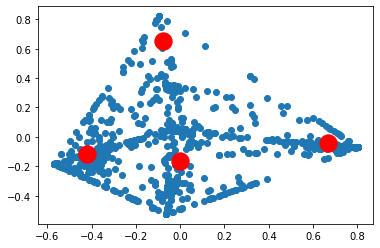

In [ ]:
Build_K_means( X_LDA_features_2d ) 

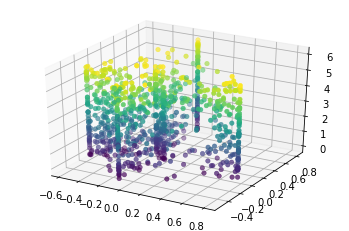

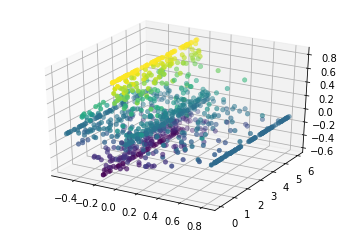

In [ ]:
plot3d(X_LDA_features_2d)

# **Plotting K_means with Word Embedding features**

 kappa = -0.23750000000000004
 silhouette_score = 0.253200301225317


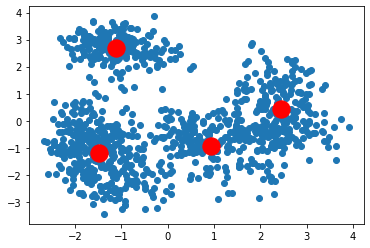

In [ ]:
Build_K_means( X_Word2Vec_feature_2d ) 


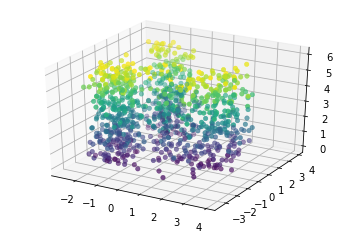

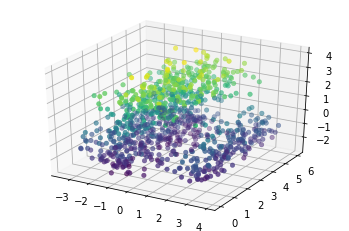

In [ ]:
plot3d(X_Word2Vec_feature_2d)

# **Building EM ( Guassian Mixture) Model with TF_IDF , N_grams , LDA**

## **Converting Data into DaraFrame**

In [ ]:
def Convert_data_2DataFrame( X_train_feature ):
  data = pd.DataFrame(  X_train_feature )
  data.columns=["X1","X2"]
  data["cluster"]= book_labels_list
  # print( data.head(   ) )
  return data 


# **Plotting Actual Data with TF_IDF**

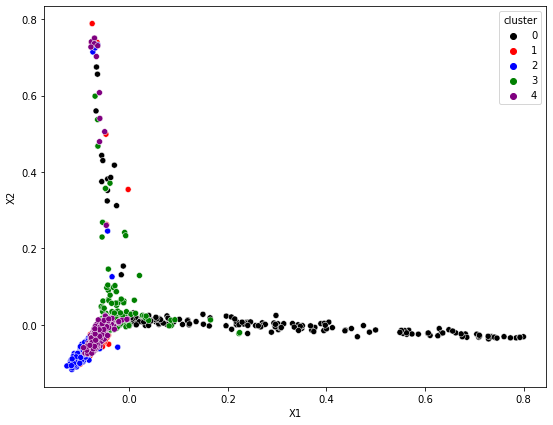

In [ ]:
data = Convert_data_2DataFrame(  X_TF_IDF_features_2D  )
plt.figure(figsize=(9,7))
sns.scatterplot(data=data, 
                x="X1",
                y="X2", 
                hue="cluster",
                palette=[ "Black" , "red","blue","green", "purple"])
plt.savefig("Data_for_fitting_Gaussian_Mixture_Models_Python.png",
                    format='png',dpi=150)


# **Building GuassianMixture Model**

In [ ]:
def Build_GaussianMixture( data ):
      
  gmm = GaussianMixture(  4 ,  covariance_type='full',  random_state=0).fit( data.iloc[ : , :2]   )
  labels = gmm.predict(   data.iloc[ : , :2]  )
  data[["predicted_cluster"]]=labels

  y_actual = data.iloc[ : , 2:3 ] 
  y_predicted = labels
  # print( y_predicted )

  kappa2 = cohen_kappa_score(y_actual , y_predicted  )

  print( " kappa = ",kappa2  )
 
  score = silhouette_score(X_LDA_features_2d, y_predicted)
  print(" silhouette_score =",score)


  plt.figure(figsize=(9,7))
  sns.scatterplot(data=data, 
                  x="X1",
                  y="X2", 
                  hue="predicted_cluster",
                  palette=[ "Black" , "red","blue","green"])
  plt.savefig("fitting_Gaussian_Mixture_Models_with_3_components_scikit_learn_Python.png",
                      format='png',dpi=150) 
     

# **Plotting Guassian Mixture Model with TF_IDF features**

 kappa =  -0.2024999999999999
 silhouette_score = -0.039904550472324926


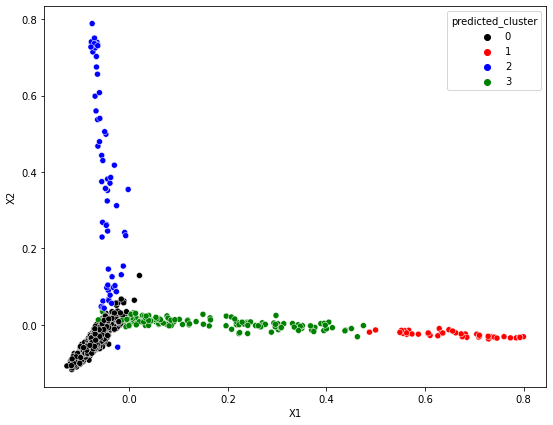

In [ ]:
data = Convert_data_2DataFrame(  X_TF_IDF_features_2D  )
Build_GaussianMixture( data ) 

# **Plotting Guassian Mixture Model with N-Grams features**

 kappa =  -0.20625000000000004
 silhouette_score = -0.022723156871977488


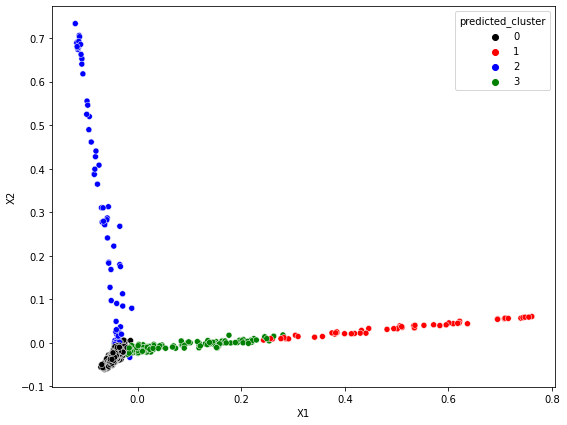

In [ ]:
data = Convert_data_2DataFrame(  X_N_Gram_features_2d  )
Build_GaussianMixture( data ) 

# **Plotting Guassian Mixture Model with LDA features**

 kappa =  -0.08624999999999994
 silhouette_score = 0.19598334528695535


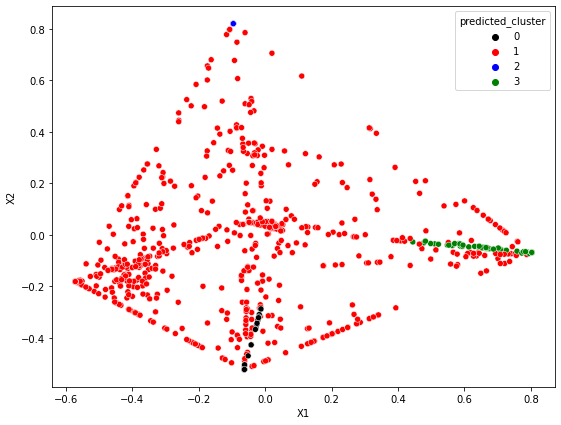

In [ ]:
data = Convert_data_2DataFrame(  X_LDA_features_2d  )
Build_GaussianMixture( data ) 

# **Plotting Guassian Mixture Model with Word Embedding features**

 kappa =  -0.23750000000000004
 silhouette_score = 0.2721778754576743


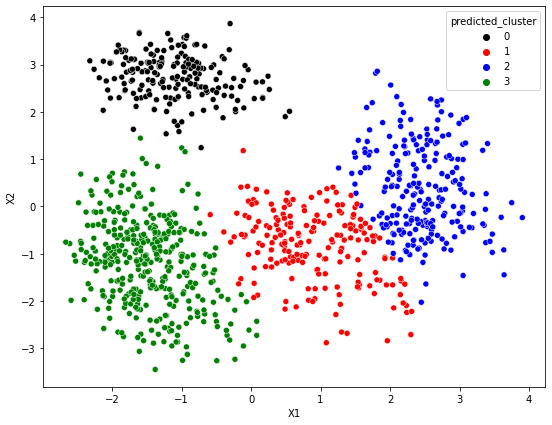

In [ ]:
data = Convert_data_2DataFrame(  X_Word2Vec_feature_2d  )
Build_GaussianMixture( data ) 



In [ ]:
def calc_coh(links):
  texts=[]
  for link in links:
    f = urlopen(link)
    myfile = f.read().decode('utf-8')  
    t = preprocessing_cleaning(myfile)
    texts.append(t)
  dictionary = corpora.Dictionary(texts)
  corpus = [dictionary.doc2bow(text) for text in texts]
  tfidf = models.TfidfModel(corpus)
  corpus_tfidf = tfidf[corpus]
  lda = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=20, passes=3)
  cm = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')
  cm2 = CoherenceModel(model=lda, texts=texts, coherence='c_v')
  coherence = cm.get_coherence()  # get coherence value
  coherence_v = cm2.get_coherence()

  print("coherence with u_mass ",coherence ,"coherence with c_v " , coherence_v)

  
  return corpus,lda,dictionary


In [ ]:
book_names = [ 'https://www.gutenberg.org/cache/epub/7361/pg7361.txt', 'https://www.gutenberg.org/cache/epub/6884/pg6884.txt', 'https://www.gutenberg.org/files/30065/30065-0.txt' , 'https://www.gutenberg.org/cache/epub/5767/pg5767.txt' , 'https://www.gutenberg.org/cache/epub/37144/pg37144.txt' ]
corpus,lda,dictionary=calc_coh( book_names)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:807: RuntimeWarning: overflow encountered in exp2
  perwordbound, np.exp2(-perwordbound), len(chunk), corpus_words


coherence with u_mass  -0.23576467651850752 coherence with c_v  0.654996568826536


In [ ]:
topics = [
          
           [ 'disease', 'hospital', 'mind'] ,
         ]

cm3 = CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
coherence_after_filter = cm3.get_coherence()

print(coherence_after_filter)

1.24988908112222e-12


In [ ]:
# topics = [
#     [ 'project', 'many', 'people'],
#     [ 'case', 'year', 'said' , 'may']
#          ]

# cm3 = CoherenceModel(topics=topics, corpus=corpus, dictionary=dictionary, coherence='u_mass')
# coherence_after_filter = cm3.get_coherence()

# print(coherence_after_filter)

# **Building Hierarchical Model**

In [ ]:
def Build_Hierarchical_Model( z ):

  plt.figure(figsize=(10, 7))
  plt.title(" Books' partition Dendograms")
  dend = shc.dendrogram(shc.linkage(z, method='ward'))

  cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
  cluster.fit_predict(z)
  # print( cluster.labels_ ) 
  plt.figure(figsize=(9, 5))
  plt.scatter(z[:,0], z[:,1], c=cluster.labels_ , cmap='rainbow' )
  y_actual = data.iloc[ : , 2:3 ] 
  kappa2 = cohen_kappa_score(y_actual , cluster.labels_  )

  print( " kappa = ",kappa2  )
 
  score = silhouette_score(X_LDA_features_2d, cluster.labels_ )
  print(" silhouette_score =",score)


# **Plotting Hierarchical Model with TF_IDF**

 kappa =  -0.13749999999999996
 silhouette_score = -0.08334445353173278


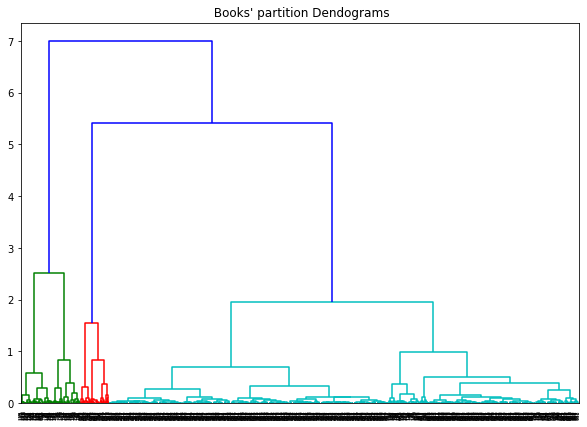

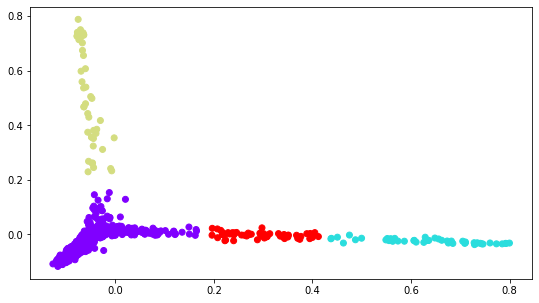

In [ ]:
Build_Hierarchical_Model(X_TF_IDF_features_2D)


# **Plotting Hierarchical Model with N_Grams**

 kappa =  -0.12624999999999997
 silhouette_score = -0.12577276643398053


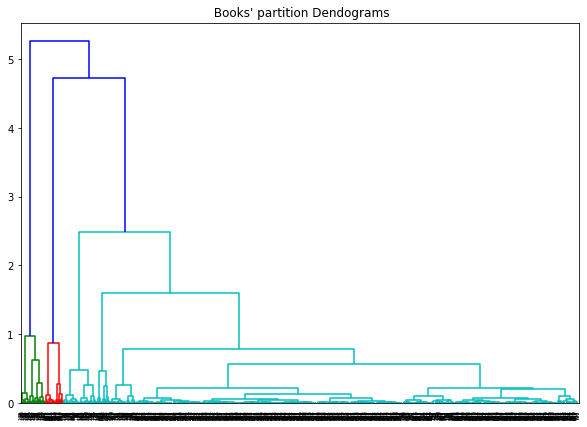

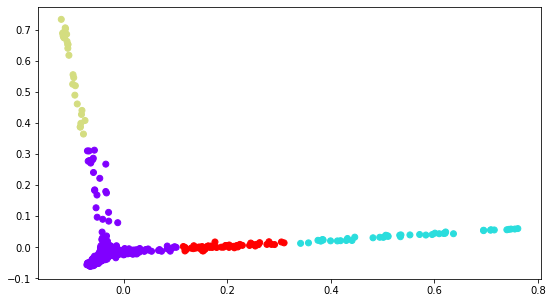

In [ ]:
Build_Hierarchical_Model(X_N_Gram_features_2d)

# **Plotting Hierarchical Model with LDA features**

 kappa =  -0.1712499999999999
 silhouette_score = 0.4732709716197545


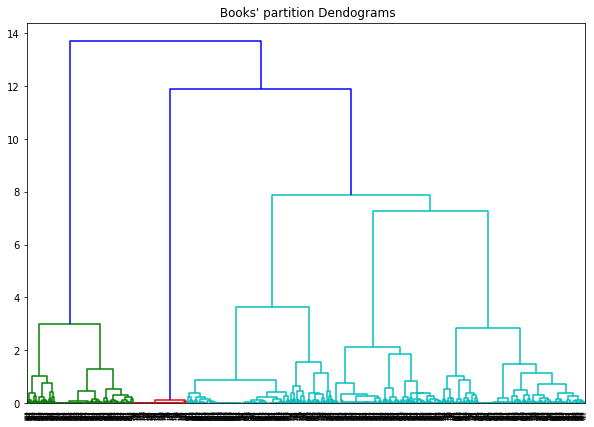

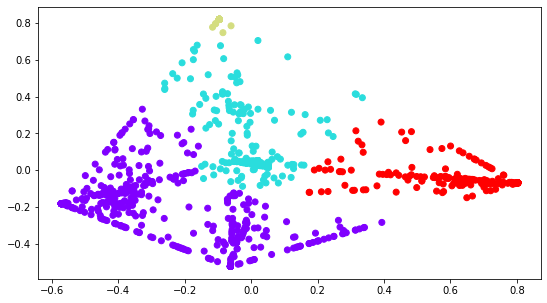

In [ ]:
Build_Hierarchical_Model(X_LDA_features_2d)

# **Plotting Hierarchical Model with Word Embedding (doc2vec) features**

 kappa =  -0.22875
 silhouette_score = 0.24787216293405515


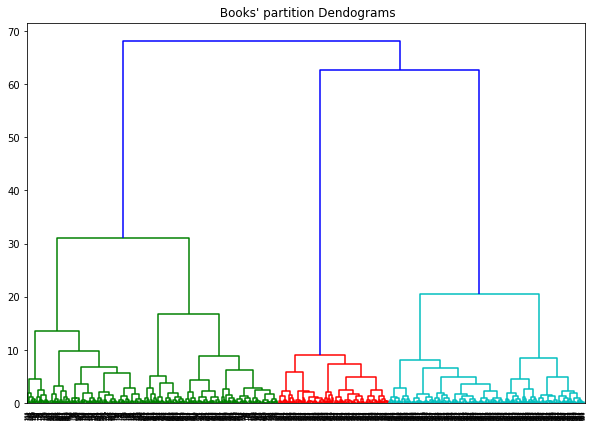

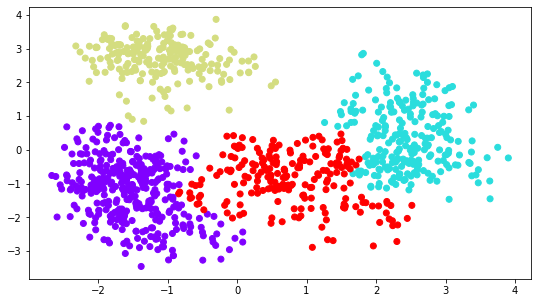

In [ ]:
Build_Hierarchical_Model(  X_Word2Vec_feature_2d  )


# **Error Analysis**
So After computing the Silhouette and kappa. We found that the highest kappa is the Hierarchical Model with N-grams features. Also we found that it gives the best results  So, we consider the Hierarchical clusterer as the champion Model. 

# **Our Champion Model    >>>   Hierarchical Model with N-grams features**
The highest  kappa ever and best predicted labels

In [ ]:
# def Build_K_means( Data_2D ):

#   kmeans = KMeans( n_clusters=4 , init='k-means++', max_iter=300, n_init=10, random_state=0)
#   pred_y = kmeans.fit_predict(  Data_2D   )
#   kappa=cohen_kappa_score(book_labels_list, pred_y )
#   print(" kappa =",kappa)
  
#   score = silhouette_score(X_LDA_features_2d, pred_y)
#   print(" silhouette_score =",score)

#   print(" calinski_harabasz_score ",sklearn.metrics.calinski_harabasz_score(X_LDA_features_2d, pred_y))

#   plt.scatter(  Data_2D[:,0],   Data_2D[:,1] )
#   plt.scatter(  kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
#   plt.show(  )

#   return pred_y

def Build_Hierarchical_Model( Data_2D ):

  plt.figure(figsize=(10, 7))
  plt.title(" Books' partition Dendograms")
  dend = shc.dendrogram(shc.linkage( Data_2D, method='ward'))

  cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
  cluster.fit_predict( Data_2D)
  # print( cluster.labels_ ) 
  plt.figure(figsize=(9, 5))
  plt.scatter( Data_2D[:,0], Data_2D[:,1], c=cluster.labels_ , cmap='rainbow' )
  y_actual = data.iloc[ : , 2:3 ] 
  kappa2 = cohen_kappa_score(y_actual , cluster.labels_  )

  print( " kappa = ",kappa2  )
  score = silhouette_score(X_LDA_features_2d, cluster.labels_ )
  print(" silhouette_score =",score)

  return cluster.labels_



# def Build_GaussianMixture( data ):
      
#   gmm = GaussianMixture(  4 ,  covariance_type='full',  random_state=0).fit( data.iloc[ : , :2]   )
#   labels = gmm.predict(   data.iloc[ : , :2]  )
#   data[["predicted_cluster"]]=labels

#   y_actual = data.iloc[ : , 2:3 ] 
#   y_predicted = labels
#   # print( y_predicted )

#   kappa2 = cohen_kappa_score(y_actual , y_predicted  )

#   print( " kappa = ",kappa2  )
 
#   score = silhouette_score(X_LDA_features_2d, y_predicted)
#   print(" silhouette_score =",score)

#   plt.figure(figsize=(9,7))
#   sns.scatterplot(data=data, 
#                   x="X1",
#                   y="X2", 
#                   hue="predicted_cluster",
#                   palette=[ "Black" , "red","blue","green", "purple"])
#   plt.savefig("fitting_Gaussian_Mixture_Models_with_3_components_scikit_learn_Python.png",
#                       format='png',dpi=150) 

#   return y_predicted

pca = PCA(  n_components=2  )
X_TF_IDF_features_2D = pca.fit_transform(  X_TF_IDF_features   )
X_N_Gram_features_2d = pca.fit_transform(  X_N_Gram_features   )
X_LDA_features_2d = pca.fit_transform(  X_LDA_features   )
X_Word2Vec_feature_2d = pca.fit_transform(  X_Word2vec_feature  )



# **Drawing Champion Model**

Although, there is tradoff between kappa and silhouette_score but it is considered the best one as a champion model

 kappa =  -0.12624999999999997
 silhouette_score = -0.12577276643331622


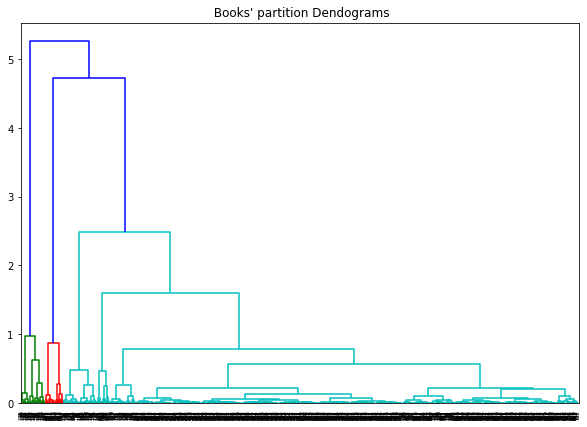

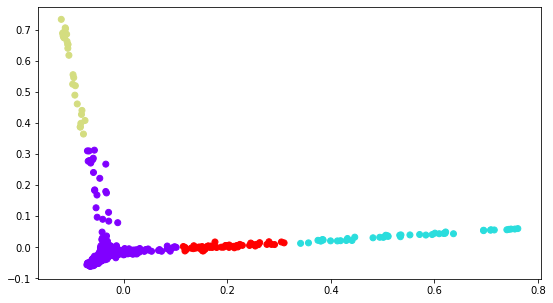

In [ ]:
# data = Convert_data_2DataFrame(  X_Word2Vec_feature_2d  )

y_pred = Build_Hierarchical_Model(  X_N_Gram_features_2d )


# **Detecting Misclassified Partitions**

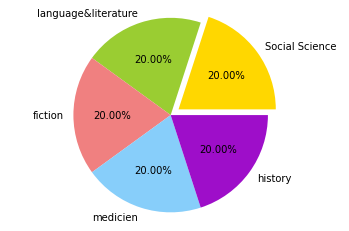

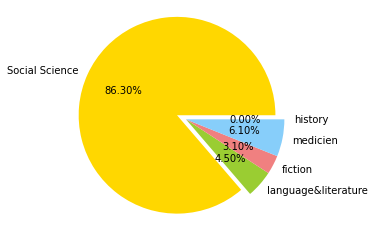

model predict social science   863 
 model predict s language& literature  45 
model predict fiction  31 
model predict History  61 
model predict medicien  0 
 
 \\\\\\\\\\\\\\ 

model predict social science Error  771 
 model predict s language& literature Error 45 
model predict fiction Error 26 
model predict History Error 59 
model predict medicien Error 0
Error Partitions Number is   901 
 
 \\\\\\\\\\\\\\\\\\\\\ 



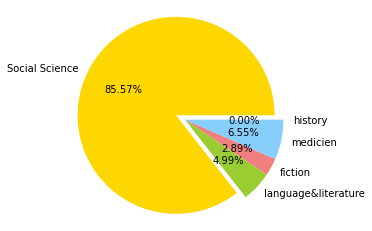

model predict social science correct   92 
model predict in language& literature correct 0 
model predict fiction correct 5 
model predict in History correct 2 
model predict in medicien correct 0
correct Partitions Number is   99


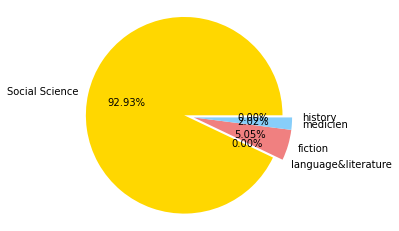

In [ ]:
error_partition =  [ ]
error_books = [ ] 
books = [ "social science " ,"language& literatures","fiction","History","medicien"]
def detect_misclassified( actual , predicted  ):
  count0,count1,count2,count3,count4=0,0,0,0,0
  count5,count6,count7,count8,count9=0,0,0,0,0
  
  
  #print( len( actual ) ) 
  #print( len( predicted ) ) 
  error_partition = [ ]
  
  for x in range( len( actual ))  :
    #print(actual[x] ,  predicted[x])
    if(   actual[x] !=  predicted[x] ):
      #print( "predict as  = " ,  books[  predicted[x]  ] ,"actual = " , books[ actual[x] ]   )
      if books[  predicted[x] ] == books[ 0]:
          count0=count0+1
      elif books[ predicted[x] ] == books[ 1]:
          count1=count1+1
      elif books[predicted[x]  ] == books[ 2]:
          count2=count2+1
      elif books[ predicted[x]  ] == books[3]:
          count3=count3+1
      else:
          count4=count4+1
      error_books.append(  book_names[ int( predicted[x] ) ]  )
      error_partition.append( book_partitions_list[x] ) 


    else:
      #print( "predict as  = " ,  books[  predicted[x]  ] ,"actual = " , books[ actual[x] ]   )
      if(   actual[x] ==  predicted[x] ):
      #print( "predict as  = " ,  books[  predicted[x]  ] ,"actual = " , books[ actual[x] ]   )
        if books[  predicted[x] ] == books[ 0]:
            count5=count5+1
        elif books[ predicted[x] ] == books[ 1]:
            count6=count6+1
        elif books[predicted[x]  ] == books[ 2]:
            count7=count7+1
        elif books[ predicted[x]  ] == books[3]:
            count8=count8+1
        else:
            count9=count9+1

      
  print("model predict social science Error ",count0,"\n model predict s language& literature Error",count1,"\nmodel predict fiction Error",count2,"\nmodel predict History Error",count3,"\nmodel predict medicien Error",count4)
  print( "Error Partitions Number is  " , len( error_partition),"\n" ,"\n \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\ \n")

  labels = 'Social Science', 'language&literature', 'fiction', 'medicien','history'
  sizes = [count0,count1,count2,count3,count4]
  colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#9e0ec9']
  explode = (0.1, 0, 0, 0,0)  # explode 1st slice

  # Plot
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.2f%%')

  plt.axis('equal')
  plt.show()


  print("model predict social science correct  ",count5,"\nmodel predict in language& literature correct",count6,"\nmodel predict fiction correct",count7,"\nmodel predict in History correct",count8,"\nmodel predict in medicien correct",count9)
  #print( "Error Partitions is :  \n" ,  book_partitions_list  )
  print( "correct Partitions Number is  " , 1000-len( error_partition) )
  labels = 'Social Science', 'language&literature', 'fiction', 'medicien','history'
  sizes = [count5,count6,count7,count8,count9]
  colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#9e0ec9']
  explode = (0.1, 0, 0, 0,0)  # explode 1st slice

  # Plot
  plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.2f%%')

  plt.axis('equal')
  plt.show()
  return error_partition , error_books

labels = 'Social Science', 'language&literature', 'fiction', 'medicien','history'
sizes = [200,200,200,200,200]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#9e0ec9']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.2f%%')

plt.axis('equal')
plt.show()

count0,count1,count2,count3,count4=0,0,0,0,0
for x in range(len(y_pred)) :
  if books[  y_pred[x] ] == books[ 0]:
          count0=count0+1
  elif books[ y_pred[x] ] == books[ 1]:
      count1=count1+1
  elif books[y_pred[x]  ] == books[ 2]:
      count2=count2+1
  elif books[ y_pred[x]  ] == books[3]:
      count3=count3+1
  else:
    count4=count4+1


labels = 'Social Science', 'language&literature', 'fiction', 'medicien','history'
sizes = [count0,count1,count2,count3,count4]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#9e0ec9']
explode = (0.1, 0, 0, 0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.2f%%')

plt.axis('equal')
plt.show( )
print("model predict social science  ",count0,"\n model predict s language& literature ",count1,"\nmodel predict fiction ",count2,"\nmodel predict History ",count3,"\nmodel predict medicien ",count4,"\n","\n \\\\\\\\\\\\\\\\\\\\\\\\\\\ \n")
 
error_partition ,  error_books = detect_misclassified(  book_labels_list ,   y_pred   )




## **Analyizing error partitions by drawing the word cloud**




the ten freq for book num :  social science 


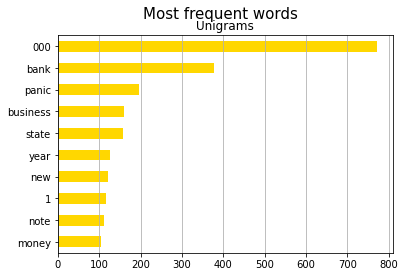

the ten freq for book num :  language& literatures


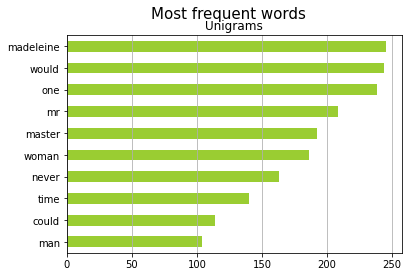

the ten freq for book num :  fiction


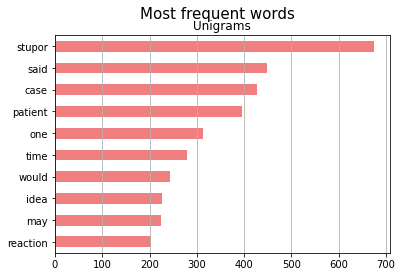

the ten freq for book num :  History


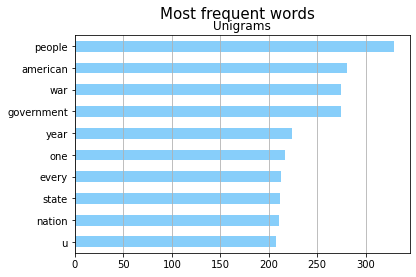

the ten freq for book num :  medicien


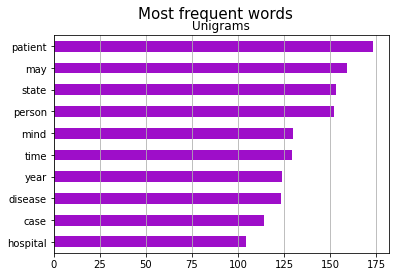

In [ ]:

def get_separate_words( book ):
  
  f = urlopen(book)
  text = f.read().decode('utf-8')    
  words =  ( preprocessing_cleaning( text  )  )
  return words

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','#9e0ec9']
for i in range(len(book_names)):
  print("the ten freq for book num : " , books[i])
  # lst_tokens =   book_partitions_list[0]  
  fig, ax = plt.subplots(nrows=1, ncols=1)
  fig.suptitle("Most frequent words", fontsize=15)
      
  ## unigrams
  dic_words_freq = nltk.FreqDist(get_separate_words( book_names[i] ))
  dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
  dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(color = colors[i],
                    kind="barh", title="Unigrams", ax=ax, 
                    legend=False).grid(axis='x')
  ax.set(ylabel=None)
      

  plt.show()

# **Analyzing our error**
By analyzing our wrong books and finding the top 10 frequent words in each of them, we found that there is high similarities between the books so the model couldn't cluster the books in the right cluster due to this similarity.   

In [ ]:
def top_freq( actual , predicted  ):
  partitions_class0,partitions_class1,partitions_class2,partitions_class3,partitions_class4=[],[],[],[],[]
  for x in range(len(y_pred)) :
    if books[  y_pred[x] ] == books[ 0]:
        partitions_class0.append(book_partitions_list[x]) 
    elif books[ y_pred[x] ] == books[ 1]:
        partitions_class1.append(book_partitions_list[x]) 
    elif books[y_pred[x]  ] == books[ 2]:
        partitions_class2.append(book_partitions_list[x]) 
    elif books[ y_pred[x]  ] == books[3]:
        partitions_class3.append(book_partitions_list[x]) 
    else:
      partitions_class4.append(book_partitions_list[x])

  print(len(partitions_class0),len(partitions_class1),len(partitions_class2),len(partitions_class3),len(partitions_class4))
  return partitions_class0,partitions_class1,partitions_class2,partitions_class3,partitions_class4

In [ ]:
partitions_class0,partitions_class1,partitions_class2,partitions_class3,partitions_class4 = top_freq(  book_labels_list ,   y_pred   )

863 45 31 61 0


In [ ]:
all_cluster_partitions=[partitions_class0,partitions_class1,partitions_class2,partitions_class3,partitions_class4 ]

print(len(all_cluster_partitions[0]))

863


In [ ]:
def get_separate_words( partitions ):
  text = " ".join(partitions) 
  print(text)
  words =  ( preprocessing_cleaning( text  )  )
  return words




soundly regulated great failure oh stock exchange sure indication fear distrust upon american business world industry languished money easy le le employed trade great captain industrial finance however patched trouble difference availing plentiful supply money soon notable speculation work gradually country took heart business experienced revival thought president roosevelt elected november 1904 would help bring discrimination good trust bad trust whose trust bad trust busting became even popular political pursuit indeed abuse practised many created situation regarding question becoming popular mind simply shall trustdom rule people people rule trust sound control constitution country must happy solution bill may 9th house representative giving interstate commerce commission power fix railroad rate ominous little noticed general business world noticed acted senate voted realize rate regulation implied railroad balance sheet stock exchange interest selling security business public awake

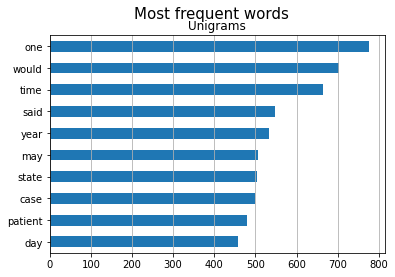

liquidation call upon country bank redeem note metropolitan bank paying allowance 1 4 1 per cent interest running 20th november time city banker held bill issued signed parcel 5 000 7 000 000 due country bank thus enabled accomplish payment note rate 20 per cent month 1st january 1858 favor repaying note rate 6 per cent granted city bank need inquire granted delay bank proved liberality abundant harvest also assisted liquidation 1853 1857 metallic reserve fell 7 000 000 deposit rose 99 000 000 discount loan 122 000 000 bank new york proportion metallic reserve deposit discount metallic advance reserve deposit 1854 15 000 000 58 000 000 80 000 000 26 1855 9 900 000 85 000 000 101 000 000 11 1856 10 000 000 100 000 000 112 000 000 10 1857 7 000 000 99 000 000 122 600 000 7 reduction metallic reserve increase deposit calling government believed something saved baring former asset business deeply wished though baring continued business form stock concern million pound capital wonderfully r

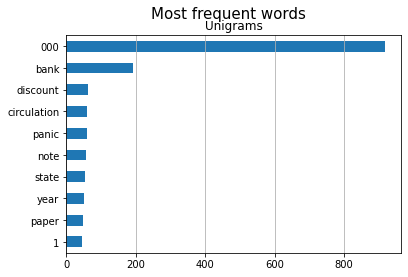

tm ebook like project gutenberg tm ebooks public domain work distributed professor michael hart project gutenberg association project among thing mean one owns united state copyright work project copy distribute united state without permission without paying copyright royalty special rule set forth apply wish copy distribute ebook project gutenberg trademark please use project gutenberg trademark market commercial product without permission create ebooks project expends considerable effort identify transcribe proofread public domain work despite effort project ebooks medium may may contain defect among thing defect may take form incomplete inaccurate corrupt data transcription error copyright intellectual property infringement defective damaged disk ebook medium computer virus computer code damage cannot read equipment limited warranty disclaimer damage right replacement refund described 1 michael hart foundation party may receive ebook project gutenberg tm ebook disclaims liability da

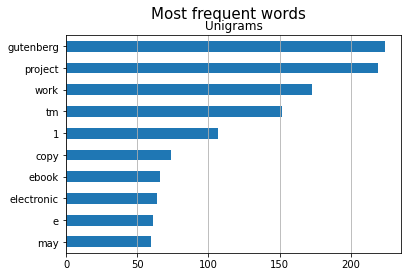

import 1836 exceeded export 50 000 000 paid gold silver outflow metal created great void advance discount rate bank england circumstance came like thunder clap distended bladder burst bank suspended payment bank note lost 10 20 per cent exchange france england rose 22 per cent metal disappeared circulation thousand failure took place english export house lost l5 000 000 l6 000 000 sterling value fell maximum minimum loss america even greater cotton fell nothing worst panic people turned bank united state president examined mean remedying trouble stated necessary maintain credit bank england stead place private credit disappeared proposed pay everything bank paper paris london amsterdam panic came bank much shaken beginning april 1837 new york bank suspended payment demand hard money export played chief role bank suspended turn promising resume bank united state suspended also mr biddle president asserting would continued pay injury done new york false new york bank upon guaranty certai

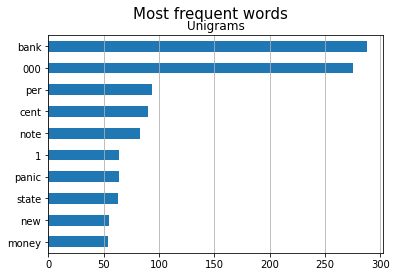

In [ ]:
for i in range(4) :
  w=get_separate_words( all_cluster_partitions[i] )
  print("the ten freq for cluster num : " , i) 
  fig, ax = plt.subplots(nrows=1, ncols=1)
  fig.suptitle("Most frequent words", fontsize=15)
      
  ## unigrams
  dic_words_freq = nltk.FreqDist(w)
  dtf_uni = pd.DataFrame(dic_words_freq.most_common(), 
                        columns=["Word","Freq"])
  dtf_uni.set_index("Word").iloc[:top,:].sort_values(by="Freq").plot(
                    kind="barh", title="Unigrams", ax=ax, 
                    legend=False).grid(axis='x')
  ax.set(ylabel=None)
      

  plt.show()